In [31]:
# for data
import pandas as pd
import numpy as np

# for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns


# for data preprocessing
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Importing libraries necessary for modelling building and training
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import torchmetrics
from torchmetrics.classification import BinaryAccuracy
import torchinfo
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mjolnir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Import Library 
# Load dataset
# Visualize spam and ham mesages
# Handling imbalance data 
# Text processing 
# Define the model architecture and train the model
# Evaluate the model

In [33]:
df=pd.read_csv('/home/mjolnir/Desktop/DeepL/Projects /Spam_Email_detection/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


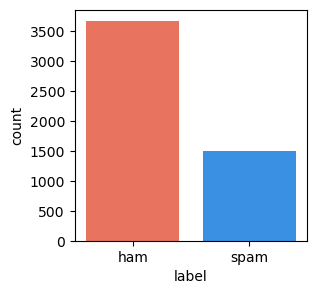

In [34]:
# Specify the colors for spam and ham
colors = ["#FF6347", "#1E90FF"]

# Specify the colors for spam and ham
plt.figure(figsize=(3,3))

# Create the countplot with custom colors
sns.countplot(x='label', data=df, palette=colors)

plt.show()

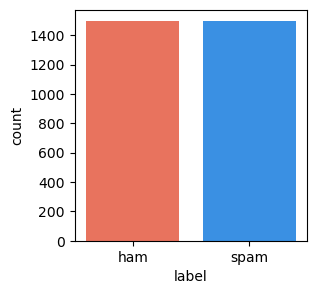

In [35]:
# Group the data by the 'label' column
grouped_data = df.groupby('label')

# Get the counts of each label
counts = grouped_data.size()
# Calculate the number of samples needed for each label
num_samples = counts['spam']
# Create a new DataFrame with equal numbers of samples for each label
new_df = pd.concat([grouped_data.get_group(label).sample(num_samples) for label in counts.index])
# Specify the colors for spam and ham
colors = ["#FF6347", "#1E90FF"]
# Specify the colors for spam and ham
plt.figure(figsize=(3,3))
# Create the countplot with custom colors
sns.countplot(x='label', data=new_df, palette=colors)
plt.show()


In [36]:
new_df['text']=new_df['text'].str.replace('Subject:', '')
new_df.head()

,Unnamed: 0,label,text,label_num
4454,3396,ham,el paso merchant deal 637225\r\ni have not he...,0
3593,3456,ham,new enrononline functionality\r\nseveral chan...,0
2898,127,ham,"reply\r\ndaren ,\r\nthank you for the comment...",0
4400,1673,ham,enron / hpl noms . for 9 / 26 / 00\r\nattache...,0
2001,1022,ham,"hl & p\r\ndaren - also , the deal might inclu...",0


In [37]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')
	imp_words = []
	# Storing the important words
	for word in str(text).split():
		word = word.lower()
		if word not in stop_words:
			imp_words.append(word)

	output = " ".join(imp_words)

	return output


new_df['text'] = new_df['text'].apply(lambda text: remove_stopwords(text))
new_df.head()



,Unnamed: 0,label,text,label_num
4454,3396,ham,el paso merchant deal 637225 heard back mike o...,0
3593,3456,ham,new enrononline functionality several changes ...,0
2898,127,ham,"reply daren , thank comments . feeling mutual ...",0
4400,1673,ham,"enron / hpl noms . 9 / 26 / 00 attached , plea...",0
2001,1022,ham,"hl & p daren - also , deal might include san j...",0


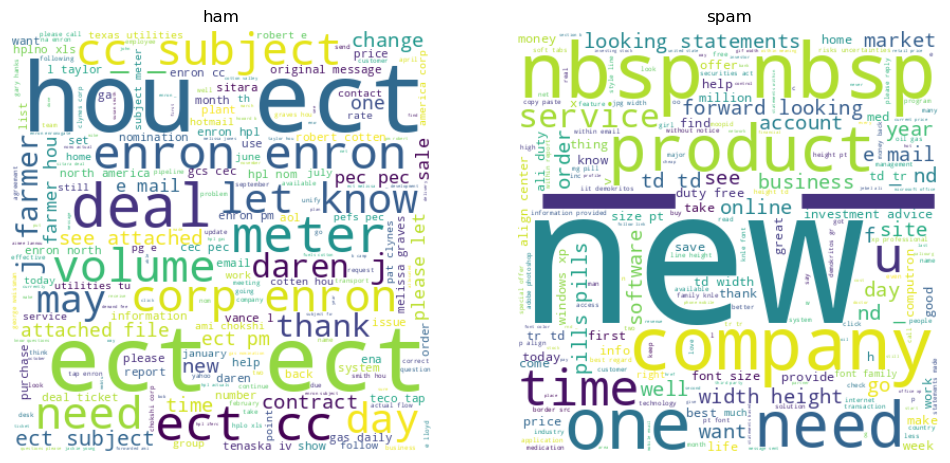

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

new_df['text_clean'] = new_df['text'].str.replace('Subject:', '')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, label in enumerate(new_df['label'].unique()):
    text = ' '.join(new_df[new_df['label'] == label]['text_clean'])
    wordcloud = WordCloud(width=400, height=400, background_color="white").generate(text)
    
    # Plot word cloud on the respective subplot
    axs[i].imshow(wordcloud, interpolation="bilinear")
    axs[i].axis("off")
    axs[i].set_title(label)

plt.show()


In [39]:
columns_to_remove = ['text_clean', 'label','Unnamed: 0']

# Check if the columns exist in the DataFrame before dropping them
columns_to_drop = [col for col in columns_to_remove if col in new_df.columns]
new_df = new_df.drop(columns=columns_to_drop, axis=1)
target_dataset = new_df['label_num']
input_dataset = new_df.drop('label_num', axis=1)

input_dataset.head()

,text
4454,el paso merchant deal 637225 heard back mike o...
3593,new enrononline functionality several changes ...
2898,"reply daren , thank comments . feeling mutual ..."
4400,"enron / hpl noms . 9 / 26 / 00 attached , plea..."
2001,"hl & p daren - also , deal might include san j..."


In [40]:
#train test split
train_X, test_X, train_Y, test_Y = train_test_split(input_dataset,
                          target_dataset,test_size = 0.2,random_state = 42)


# Function to preprocess text.
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize text into individual words.
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
     
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

# Preprocess training data.
#preprocessed_train_data = train_X['text'].apply(preprocess_text)
#preprocessed_test_data  = test_X['text'].apply(preprocess_text)


# Preprocess training data.
preprocessed_train_data = [preprocess_text(text) for text in train_X['text']]
preprocessed_test_data = [preprocess_text(text) for text in test_X['text']]


# check unique tokens in the training data and the test_data.
unique_tokens = set()
for sentence in preprocessed_train_data:
    unique_tokens.update(sentence)

print(f"Number of unique tokens: {len(unique_tokens)}")



Number of unique tokens: 38083


In [41]:
import torch
from torch.nn.utils.rnn import pad_sequence

# Create vocabulary mapping words to indices
word_to_index = {}
index = 0
for sentence in preprocessed_train_data:
    for word in sentence:
        if word not in word_to_index:
            word_to_index[word] = index
            index += 1

# Map words to indices and pad sequences.
indexed_data = []
for sentence in preprocessed_train_data:
    indexed_sentence = [word_to_index[word] for word in sentence]
    indexed_data.append(torch.tensor(indexed_sentence))


# Pad sequences to a uniform length
padded_data = pad_sequence(indexed_data, batch_first=True)
# Convert padded sequences to tensor
train_data_tensor=padded_data


# tensor train_Y data.
train_Y_tensor = torch.tensor(train_Y.values,dtype=torch.float32)
train_data_tensor = torch.tensor(train_data_tensor, dtype=torch.float32)

train_Y_tensor.shape

torch.Size([2398])

In [42]:
train_data_tensor.shape

torch.Size([2398, 3474])

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpamDetectionRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout):
        super(SpamDetectionRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        out = self.sigmoid(out)
        return out
      
      
      
      
input_dim =  3474  # e.g. word embeddings of size 128
hidden_dim = 256
output_dim = 1  # binary classification (spam or not spam)
num_layers = 4  # Increase the number of layers to 3
dropout = 0.2

model = SpamDetectionRNN(input_dim, hidden_dim, output_dim, num_layers, dropout)

# # Get the summary of the model.
summary = torchinfo.summary(model) 
summary


Layer (type:depth-idx)                   Param #
SpamDetectionRNN                         --
├─RNN: 1-1                               1,350,144
├─Linear: 1-2                            257
├─Sigmoid: 1-3                           --
Total params: 1,350,401
Trainable params: 1,350,401
Non-trainable params: 0

In [44]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# # Define the neural network architecture with an RNN layer
# class SpamDetectionRNN(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(SpamDetectionRNN, self).__init__()
#         self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.sigmoid = nn.Sigmoid()
        
#     def forward(self, x):
#         out, _ = self.rnn(x)
#         out = self.fc(out[:, -1, :])  # Taking the output of the last time step only
#         out = self.sigmoid(out)
#         return out

# # Define the input size, hidden layer size, and output size
# input_size = 3474
# hidden_size = 128
# output_size = 1

# # Initialize the model.
# model = SpamDetectionRNN(input_size, hidden_size, output_size)

# # Get the summary of the model.
# summary = torchinfo.summary(model) 
# summary



In [45]:
# Assuming train_data_tensor and train_Y_tensor are defined elsewhere
# Create a DataLoader object

batch_size = 64
dataset = TensorDataset(train_data_tensor, train_Y_tensor,)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

#for batch_data, batch_labels in data_loader:
  #print(batch_data.shape)
  #print(batch_labels.shape)
  

In [46]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchmetrics


# Initialize the model (reusing SpamDetectionRNN from the previous code)
input_size = 3474
hidden_size = 128
output_size = 1
model = SpamDetectionRNN(input_size, hidden_size, output_size)

# Define your optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define your loss function
loss_function = nn.BCELoss()

# Define your metric using torchmetrics
metric = torchmetrics.Accuracy(task='binary')

num_epochs = 20

# Training loop.
for epoch in range(num_epochs):
    for batch_data, batch_labels in data_loader:
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(batch_data)
        
        # Calculate loss
        loss = loss_function(outputs, batch_labels.unsqueeze(1))  # Assuming batch_labels is 1D, BCELoss expects 2D input
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()  # Update model parameters
        
        # Update metric
        metric.update(outputs, batch_labels.int())  # BinaryAccuracy needs integer labels
        
    # Calculate and print metric for the epoch
    accuracy = metric.compute()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Accuracy: {accuracy.item()}')
    
    # Reset the metric for the next epoch
    metric.reset()


TypeError: SpamDetectionRNN.__init__() missing 2 required positional arguments: 'num_layers' and 'dropout'